In [389]:
import json, random, time, os
import numpy as np
from pprint import pprint
from collections import Counter, defaultdict
from bs4 import BeautifulSoup
import requests
import urllib.request
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import pickle
import copy
import string
import wikipedia
import spacy
from itertools import tee
import pylcs
np.set_printoptions(precision=4)

In [2]:
API_URL = 'http://en.wikipedia.org/w/api.php'

In [200]:
nlp = spacy.load('en_core_web_sm')

In [3]:
USER_AGENT_LIST = [
            "Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1; AcooBrowser; .NET CLR 1.1.4322; .NET CLR 2.0.50727)",
            "Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 6.0; Acoo Browser; SLCC1; .NET CLR 2.0.50727; Media Center PC 5.0; .NET CLR 3.0.04506)",
            "Mozilla/4.0 (compatible; MSIE 7.0; AOL 9.5; AOLBuild 4337.35; Windows NT 5.1; .NET CLR 1.1.4322; .NET CLR 2.0.50727)",
            "Mozilla/5.0 (Windows; U; MSIE 9.0; Windows NT 9.0; en-US)",
            "Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Win64; x64; Trident/5.0; .NET CLR 3.5.30729; .NET CLR 3.0.30729; .NET CLR 2.0.50727; Media Center PC 6.0)",
            "Mozilla/5.0 (compatible; MSIE 8.0; Windows NT 6.0; Trident/4.0; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; .NET CLR 1.0.3705; .NET CLR 1.1.4322)",
            "Mozilla/4.0 (compatible; MSIE 7.0b; Windows NT 5.2; .NET CLR 1.1.4322; .NET CLR 2.0.50727; InfoPath.2; .NET CLR 3.0.04506.30)",
            "Mozilla/5.0 (Windows; U; Windows NT 5.1; zh-CN) AppleWebKit/523.15 (KHTML, like Gecko, Safari/419.3) Arora/0.3 (Change: 287 c9dfb30)",
            "Mozilla/5.0 (X11; U; Linux; en-US) AppleWebKit/527+ (KHTML, like Gecko, Safari/419.3) Arora/0.6",
            "Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.8.1.2pre) Gecko/20070215 K-Ninja/2.1.1",
            "Mozilla/5.0 (Windows; U; Windows NT 5.1; zh-CN; rv:1.9) Gecko/20080705 Firefox/3.0 Kapiko/3.0",
            "Mozilla/5.0 (X11; Linux i686; U;) Gecko/20070322 Kazehakase/0.4.5",
            "Mozilla/5.0 (X11; U; Linux i686; en-US; rv:1.9.0.8) Gecko Fedora/1.9.0.8-1.fc10 Kazehakase/0.5.6",
            "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.56 Safari/535.11",
            "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_3) AppleWebKit/535.20 (KHTML, like Gecko) Chrome/19.0.1036.7 Safari/535.20",
            "Opera/9.80 (Macintosh; Intel Mac OS X 10.6.8; U; fr) Presto/2.9.168 Version/11.52",
            "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/536.11 (KHTML, like Gecko) Chrome/20.0.1132.11 TaoBrowser/2.0 Safari/536.11",
            "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/21.0.1180.71 Safari/537.1 LBBROWSER",
            "Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; WOW64; Trident/5.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; .NET4.0C; .NET4.0E; LBBROWSER)",
            "Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1; QQDownload 732; .NET4.0C; .NET4.0E; LBBROWSER)",
            "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.84 Safari/535.11 LBBROWSER",
            "Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 6.1; WOW64; Trident/5.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; .NET4.0C; .NET4.0E)",
            "Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; WOW64; Trident/5.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; .NET4.0C; .NET4.0E; QQBrowser/7.0.3698.400)",
            "Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1; QQDownload 732; .NET4.0C; .NET4.0E)",
            "Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1; Trident/4.0; SV1; QQDownload 732; .NET4.0C; .NET4.0E; 360SE)",
            "Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1; QQDownload 732; .NET4.0C; .NET4.0E)",
            "Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 6.1; WOW64; Trident/5.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; .NET4.0C; .NET4.0E)",
            "Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/21.0.1180.89 Safari/537.1",
            "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/21.0.1180.89 Safari/537.1",
            "Mozilla/5.0 (iPad; U; CPU OS 4_2_1 like Mac OS X; zh-cn) AppleWebKit/533.17.9 (KHTML, like Gecko) Version/5.0.2 Mobile/8C148 Safari/6533.18.5",
            "Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:2.0b13pre) Gecko/20110307 Firefox/4.0b13pre",
            "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:16.0) Gecko/20100101 Firefox/16.0",
            "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11",
            "Mozilla/5.0 (X11; U; Linux x86_64; zh-CN; rv:1.9.2.10) Gecko/20100922 Ubuntu/10.10 (maverick) Firefox/3.6.10",
            "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36",
        ]

In [134]:
url_blocklist = ['seal', 'sign ', 'pdf', 'gif', 'icon', 'notice', 'cartoon', 'publish', 'menu', 'logo', 'svg', 'webm', 'page', \
                     'ogg', 'flickr', 'poster', 'ogv', 'banner', 'tif', 'montage', 'centralautologin', 'footer']

In [202]:
pos_list = ['NUM', 'NOUN', 'ADJ', 'PROPN']

In [204]:
pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*|\(|\)|-')

In [207]:
PUNCTUATIONS = set(string.punctuation)

In [191]:
new_txt_data = json.load(open("/home/yingshac/CYS/WebQnA/WebQnA_data_new/output_mine_all_schema.json", "r"))
print(len(new_txt_data))

7921


In [216]:
def IoU(A, B):
    intersection = len(A.intersection(B))
    union = len(A.union(B))
    return round(intersection / (union+1e-7), 2)

In [101]:
def _wiki_request(params):
  
    global USER_AGENT_LIST

    params['format'] = 'json'
    if not 'action' in params:
        params['action'] = 'query'

    headers = {
        'User-Agent': random.choice(USER_AGENT_LIST)#'wikipedia (https://github.com/goldsmith/Wikipedia/)'
    }

    r = requests.get(API_URL, params=params, headers=headers)
    return r.json()

In [97]:
def content(title):

    query_params = {
        'prop': 'extracts|revisions',
        'explaintext': '',
        'rvprop': 'ids',
        'titles': title
    }
    request = _wiki_request(query_params)
    result = request['query']['pages']
    content = result[list(result.keys())[0]]['extract']
    return content

In [105]:
### Takeaway: get html from wikipedia pypi is somehow pretty slow. But the library gives cleaner content
### Decision: html is to be obtained from url request; 
###           content is to be obtained from the (stolen) library function, with USER_AGENT_LIST (using the wiki github user agent doesn't make much difference)

start = time.time()
for i in range(100):
    if i%10 == 9: print(i)
    url = "https://en.wikipedia.org/wiki/Egyptian_tombs"
    req = urllib.request.Request(url, headers = {'User-Agent': random.choice(USER_AGENT_LIST)})
    with urllib.request.urlopen(req) as f:
        html = f.read().decode('utf-8')
    end_indx = html.find('<h2><span class="mw-headline" id="References">References</span>')
    html = html[:end_indx]
    soup = BeautifulSoup(html, 'html.parser')
    cont = content("Egyptian tombs") # The stolen function works faster than wikipedia.page().content
print(time.time() - start)

9
19
29
39
49
59
69
79
89
99
40.43351101875305


In [140]:
def get_html(url):
    req = urllib.request.Request(url, headers = {'User-Agent': random.choice(USER_AGENT_LIST)})
    with urllib.request.urlopen(req) as f:
        html = f.read().decode('utf-8')
    end_indx = html.find('<h2><span class="mw-headline" id="References">References</span>')
    html = html[:end_indx]
    return html

In [259]:
### Scrap imgs and their captions. 
def get_imgs_and_captions(html):
    soup = BeautifulSoup(html, 'html.parser')
    links = soup.find_all('img')
    imgUrls = []
    captions = []
    for l in links:
        imgUrl = l.get('src')
        try: 
            width = int(l['width'])
            height = int(l['height'])
        except:
            continue
        if width<100 or height<100:
            continue
        if any(b in imgUrl.lower() for b in url_blocklist): 
            continue
        imgUrls.append(imgUrl)

        # Special case for thumb images, which are located inside a table
        thumbinner_div = l.find_parent("div", class_='thumbinner')
        if thumbinner_div: 
            captions.append(thumbinner_div.text)
            continue
        
        segments = []
        prev_th = l.find_previous('th')
        if prev_th: segments.append(prev_th.get_text(strip=True))
            
        tr_parent = l.find_parent('tr')
        if tr_parent: segments.append(tr_parent.get_text(strip=True))

        captions.append(". ".join(segments))
    return imgUrls, captions

In [615]:
def find_pages_by_hyperlink(keywords, url):
    if 'en.wikipedia.org' not in url: return {}
    anchor2page = {}
    req = urllib.request.Request(url, headers = {'User-Agent': random.choice(USER_AGENT_LIST)})
    try: 
        with urllib.request.urlopen(req) as f:
            html = f.read().decode('utf-8')
    except:
        return anchor2page
    end_indx = html.find('<h2><span class="mw-headline" id="References">References</span>')
    html = html[:end_indx]
    soup = BeautifulSoup(html, 'html.parser')
    links = soup.find_all('a', attrs={'href': re.compile("^/wiki/(?!.*(:|\(identifier\))).*")})
    for link in links:
        title = link.get('title')
        text = link.text
        if title is None or not text: continue
        #print(link)
        if any(b in keywords for b in title.split()):
            pagelink = 'https://en.wikipedia.org' + link.get('href')
            if pagelink.find("#") > -1:
                pagelink = pagelink[:pagelink.find("#")]
            anchor2page[__load(title)] = pagelink
        if len(text) == 0: print(link)
        elif pylcs.lcs(title.lower(), text.lower())/len(text) < 0.85:
            if any(b in keywords for b in text.split()):
                pagelink = 'https://en.wikipedia.org' + link.get('href')
                if pagelink.find("#") > -1:
                    pagelink = pagelink[:pagelink.find("#")]
                anchor2page[__load(title)] = pagelink
    if '' in anchor2page: del anchor2page['']
    return anchor2page

In [613]:
def get_keywords_and_relevant_pages_from_txt_sample(k):
    Q = new_txt_data[str(k)]['Q']
    doc = nlp(Q)
    keywords = set([t.text for s in doc.sents for t in s if t.pos_ in pos_list or ((not t.is_sent_start) and t.text[0].isupper())])
    titlewords = set()
    anchor2page = {}
    for f in new_txt_data[str(k)]['SupportingFacts']:
        if not 'en.wikipedia.org/wiki/' in f['url']: continue
        fact_title_raw = ' '.join(urllib.parse.unquote(f['url']).split('/')[-1].split('_'))
        fact_title = pattern.sub('', fact_title_raw)
        titlewords = titlewords.union(fact_title.split())
        for title in wikipedia.search(fact_title_raw):
            anchor2page[__load(title)] = "https://en.wikipedia.org/wiki/" + urllib.parse.quote("_".join(title.split()))
    keywords = keywords - PUNCTUATIONS
    keywords = set(sum([[w.capitalize(), w.lower()] for w in keywords], []))
    titlewords = titlewords - PUNCTUATIONS
    
    print("#pages before extension by hyperlink: ", len(anchor2page))
    for f in new_txt_data[str(k)]['SupportingFacts']:
        d = find_pages_by_hyperlink(keywords.union(titlewords), urllib.parse.quote(f['url'], safe='://', encoding=None, errors=None))
        anchor2page.update(d)
    if '' in anchor2page: del anchor2page['']
    print("#pages after extension by hyperlink: ", len(anchor2page))
    
    A = new_txt_data[str(k)]['A']
    doc = nlp(A)
    answerwords = set([t.text for t in doc if t.pos_ in pos_list or ((not t.is_sent_start) and t.text[0].isupper())]) - keywords
    answerwords = answerwords - PUNCTUATIONS
    answerwords = set(sum([[w.capitalize(), w.lower()] for w in answerwords], []))
    goldfactwords = set()
    Q_A_words = keywords.union(answerwords)
    for f in new_txt_data[str(k)]['SupportingFacts']:
        doc = nlp(f['fact'])
        goldfactwords = goldfactwords.union(set([t.text for t in doc if t.pos_ in pos_list or ((not t.is_sent_start) and t.text[0].isupper())]) - Q_A_words)
    goldfactwords = goldfactwords - PUNCTUATIONS
    goldfactwords = set(sum([[w.capitalize(), w.lower()] for w in goldfactwords], []))
    
    for a in list(anchor2page.keys()):
        if is_disambiguation_page(anchor2page[a]):
            print(a, " is an disambiguation page")
            for t in recover_disambiguation_page(a):
                try: anchor2page[__load(t)] = "https://en.wikipedia.org/wiki/" + urllib.parse.quote("_".join(t.split())) 
                ### Rarely get some keywordError cuz the returned value from _wiki_request is missing a certain field
                except: pass
            del anchor2page[a]
    if '' in anchor2page: del anchor2page['']
    return titlewords, keywords, goldfactwords, answerwords, Q, A, anchor2page

In [171]:
def get_page_categories(title):
    url = 'https://en.wikipedia.org/w/api.php?format=xml&action=query&prop=categories&titles='+urllib.parse.quote(title)
    req = urllib.request.Request(url, headers = {'User-Agent': random.choice(USER_AGENT_LIST)})
    with urllib.request.urlopen(req) as f:
        xml = f.read().decode('utf-8')
    soup= BeautifulSoup(xml,"lxml-xml")
    tags = soup.find('categories')
    if tags is None: return []
    categories = [c.get('title').replace("Category:", "") for c in tags]
    return categories
def is_disambiguation_page(url):
    title = url.split('/')[-1]
    return 'disambiguation' in " ".join(get_page_categories(title))
def recover_disambiguation_page(title):
    try: 
        wikipedia.page(title)
        return []
    except Exception as e:
        err = str(e)
        return err[err.find("may refer to:")+13:].strip().split('\n')

In [179]:
def __load(title):
    '''
    Load basic information from Wikipedia.
    Confirm that page exists and is not a disambiguation/redirect.
    Does not need to be called manually, should be called automatically during __init__.
    '''
    query_params = {
        'prop': 'info|pageprops',
        'inprop': 'url',
        'ppprop': 'disambiguation',
        'redirects': '',
        'titles': title
    }

    request = _wiki_request(query_params)

    query = request['query']
    pageid = list(query['pages'].keys())[0]
    page = query['pages'][pageid]

    # missing is present if the page is missing
    if 'missing' in page:
        print("Page is missing: ", title)
        return ""

    # same thing for redirect, except it shows up in query instead of page for whatever silly reason
    elif 'redirects' in query:
        redirects = query['redirects'][0]
        return redirects['to']

    return title

In [350]:
def find_sentences_from_page(title, page, keywords, answerwords, goldfactwords):
    try: 
        cont = content(title)
        paragraphs = cont[:cont.find('== References ==')].split('\n')
        
    except: 
        print("Exception from find_sentences_from_page, title = ", title)
        return {}
    sen2score = {}
    for p in paragraphs:
        if len(p.split()) >= 10:
            doc = nlp(p)
            for s in doc.sents:
                if len(s) < 10: 
                    continue
                nouns_in_s = [t.text for t in s if (t.pos_ in pos_list or ((not t.is_sent_start) and t.text[0].isupper()))]

                IoU_Q = IoU(set(nouns_in_s), keywords)
                IoU_A = IoU(set(nouns_in_s), answerwords)
                if IoU_Q -  IoU_A > 0.06:
                    #print(IoU_Q, IoU_A, s.text)
                    IoU_G = IoU(set(nouns_in_s), goldfactwords)
                    sen2score[s.text] = {'scores': (IoU_Q, IoU_A, IoU_G, IoU_Q - IoU_A, IoU_Q - IoU_A - IoU_G), 'link': page, 'title': title}

    for p in paragraphs:
        if len(p.split()) >= 10:
            doc = nlp(p)
            it1, it2 = tee(doc.sents)
            next(it2, None)
            for s1, s2 in zip(it1, it2):
                if len(s1) < 5 or len(s2) < 5 or len(s1)+len(s2) > 70 or len(s1)+len(s2) < 10: 
                    continue 
                nouns_in_s = [t.text for s in [s1, s2] for t in s if (t.pos_ in pos_list or ((not t.is_sent_start) and t.text[0].isupper()))]

                IoU_Q = IoU(set(nouns_in_s), keywords)
                IoU_A = IoU(set(nouns_in_s), answerwords)
                if IoU_Q -  IoU_A >= 0.06:
                    #print(IoU_Q, IoU_A, " ".join([s1.text, s2.text]))
                    IoU_G = IoU(set(nouns_in_s), goldfactwords)
                    sen2score[" ".join([s1.text, s2.text])] = {'scores': (IoU_Q, IoU_A, IoU_G, IoU_Q - IoU_A, IoU_Q - IoU_A - IoU_G), 'link': page, 'title': title}
                    #print(s)
    #print(len(sen2score))
    return sen2score

In [533]:
def find_imgs_from_page(title, page, keywords, answerwords, goldfactwords):
    try: 
        html = get_html(page)
        imgs, caps = get_imgs_and_captions(html)
        
    except: 
        print("Exception from find_imgs_from_page, page = ", page)
        return {}
    
    cap2score = {}
    for im, cap in zip(imgs, caps):
        doc = nlp(cap)
        nouns_in_s = [t.text for t in doc if (t.pos_ in pos_list or ((not t.is_sent_start) and t.text[0].isupper()))]

        IoU_Q = IoU(set(nouns_in_s), keywords)
        IoU_A = IoU(set(nouns_in_s), answerwords)
        if IoU_Q -  IoU_A > 0.0: # 0.06
            IoU_G = IoU(set(nouns_in_s), goldfactwords)
            cap2score[doc.text] = {'scores': (IoU_Q, IoU_A, IoU_G, IoU_Q - IoU_A, IoU_Q - IoU_A - IoU_G), 'img':im, 'link': page, 'title': title}    
    #print(len(cap2score))
    return cap2score

In [530]:
def get_pages_from_Q_via_noun_chunks(Q):
    doc = nlp(Q)
    
    ### Extract noun chunks
    proper_words = [t.text for s in doc.sents for t in s if t.pos_ in ['NUM', 'PROPN', 'ADJ'] or ((not t.is_sent_start) and t.text[0].isupper())]
    chunks = set()
    for chunk in doc.noun_chunks:
        if any([n in proper_words for n in chunk.text.split()]):
            chunks.add(chunk.text)
    if not chunks: 
        chunks = chunks.union([c.text for c in doc.noun_chunks])
        chunks = chunks.union([t.text for s in doc.sents for t in s if t.pos_ == 'PROPN' or ((not t.is_sent_start) and t.text[0].isupper())])
    
    pages = set()
    for chunk in chunks:
        pages = pages.union(set(wikipedia.search(chunk)))
    if len(pages) < 5:
        more_chunks = set()
        for token in doc:
            if token.dep_ == 'amod' or token.dep_ == 'compound':
                more_chunks.add(doc[token.i: token.head.i+1].text if token.head.i > token.i else doc[token.head.i:token.i+1].text)
        more_chunks = more_chunks - chunks
        print(Q)
        print("More chunks: ", more_chunks)
        for chunk in more_chunks:
            pages = pages.union(wikipedia.search(chunk))
        chunks = chunks.union(more_chunks)
    
    print("num of pages: ", len(pages))
    anchor2page = {}
    for title in pages:
        anchor2page[__load(title)] = "https://en.wikipedia.org/wiki/" + urllib.parse.quote("_".join(title.split()))
    for a in list(anchor2page.keys()):
        if is_disambiguation_page(anchor2page[a]):
            print(a, " is an disambiguation page")
            for t in recover_disambiguation_page(a):
                anchor2page[__load(t)] = "https://en.wikipedia.org/wiki/" + urllib.parse.quote("_".join(t.split()))
            del anchor2page[a]
    if '' in anchor2page: del anchor2page['']
    return anchor2page

In [536]:
def dummy_get_sen2score_from_indx(k):
    print('k = ', k)
    titlewords, keywords, goldfactwords, answerwords, Q, A, anchor2page = get_keywords_and_relevant_pages_from_txt_sample(k)
    print("Q = ", Q)
    print("A = ", A)
    print("keywords = ", keywords)
    print("titlewords = ", titlewords)
    print("answerwords = ", answerwords)
    print("goldfactwords = ", goldfactwords)
    
    new_anchor2page = get_pages_from_Q_via_noun_chunks(Q)
    sen2score = {}
    cap2score = {}
    for title in new_anchor2page:
        sen2score.update(find_sentences_from_page(title, new_anchor2page[title], keywords, answerwords, goldfactwords))
        cap2score.update(find_imgs_from_page(title, new_anchor2page[title], keywords, answerwords, goldfactwords))
    sen2score = dict(sorted(sen2score.items(), key=lambda x: x[1]['scores'][-1], reverse=True))
    cap2score = dict(sorted(cap2score.items(), key=lambda x: x[1]['scores'][-1], reverse=True))
    print("total num of sentences found = ", len(sen2score))
    print("total num of imgs found = ", len(cap2score))
    if len(sen2score) == 0:
        for title in anchor2page: sen2score.update(find_sentences_from_page(title, anchor2page[title], keywords.union(titlewords), answerwords, goldfactwords))
        for title in new_anchor2page: sen2score.update(find_sentences_from_page(title, new_anchor2page[title], keywords.union(titlewords), answerwords, goldfactwords))
        print("After accepting overlap with titlewords, total num of sentences found = ", len(sen2score))
    if len(cap2score) == 0:
        for title in anchor2page: cap2score.update(find_imgs_from_page(title, anchor2page[title], keywords.union(titlewords), answerwords, goldfactwords))
        for title in new_anchor2page: cap2score.update(find_imgs_from_page(title, new_anchor2page[title], keywords.union(titlewords), answerwords, goldfactwords))
        print("After accepting overlap with titlewords, total num of imgs found = ", len(cap2score))
    
    word_lists = (titlewords, keywords, goldfactwords, answerwords)
    return sen2score, cap2score, word_lists

In [352]:
def get_sen2score_from_indx(k):
    print('k = ', k)
    titlewords, keywords, goldfactwords, answerwords, Q, A, anchor2page = get_keywords_and_relevant_pages_from_txt_sample(k)
    print("Q = ", Q)
    print("A = ", A)
    print("keywords = ", keywords)
    print("titlewords = ", titlewords)
    print("answerwords = ", answerwords)
    print("goldfactwords = ", goldfactwords)
    
    print(" -- find sentences from each page --")
    sen2score = {}
    cap2score = {}
    for title in anchor2page:
        sen2score.update(find_sentences_from_page(title, anchor2page[title], keywords, answerwords, goldfactwords))
        cap2score.update(find_imgs_from_page(title, anchor2page[title], keywords, answerwords, goldfactwords))
    sen2score = dict(sorted(sen2score.items(), key=lambda x: x[1]['scores'][-1], reverse=True))
    cap2score = dict(sorted(cap2score.items(), key=lambda x: x[1]['scores'][-1], reverse=True))
    print("total num of sentences found = ", len(sen2score))
    print("total num of imgs found = ", len(cap2score))
    
    word_lists = (titlewords, keywords, goldfactwords, answerwords)
    return sen2score, cap2score, word_lists

In [333]:
def highlight_words(word_lists, colors, sentence):
    s = copy.deepcopy(sentence)
    for word_list, color in zip(word_lists, colors):
        try: 
            if "".join(word_list): 
                s = re.sub(r'\b(' + r'|'.join([re.escape(c) for c in word_list]) + r')\b\s*', lambda m: '<span style="background-color:rgb{}">{}</span>'.format(color, m.group()), s)
        except: 
            print(s)
            print(word_list)
            raise
    return s

In [357]:
def add_html_row(k, sen2score, cap2score, word_lists, colors = ["(223, 255, 238)", "(193, 239, 253)", "(253, 252, 152)", "(255, 214, 222)"]):
    html = ""
    html += '<tr><td>{}.</td><td>Q: {}<br>'.format(k, highlight_words(word_lists, colors, new_txt_data[str(k)]['Q']))
    for f in new_txt_data[str(k)]['SupportingFacts']:
        html += '<br><br>&nbsp;&nbsp;{}'.format(highlight_words(word_lists, colors, f['fact']))
        html += '<a href="{}"> link</a>'.format(f['url'])
    html += '<br><br>A: {}<br>'.format(highlight_words(word_lists, colors, new_txt_data[str(k)]['A']))
    html += '</td><td>'
    s_buckets = defaultdict(lambda: [])
    for s in sen2score:
        if sen2score[s]['scores'][2] == 0.0 and sen2score[s]['scores'][1] == 0.0 and len(s.split()) in range(22, 60):
            s_buckets['good'].append(s)
        elif sen2score[s]['scores'][1] > 0.0 or sen2score[s]['scores'][2] > 0.0:
            s_buckets['(maybe)falseneg'].append(s)
    
    for s in s_buckets['good'][:10]:
        html += '{} --- {} '.format(highlight_words(word_lists, colors, s), str(sen2score[s]['scores']))
        html += '<a href="{}"> {}</a><br><br>'.format(sen2score[s]['link'], sen2score[s]['title'])
    html += '<strong> ----------------- (maybe)falseneg ---------------- </strong><br>'
    for s in random.sample(s_buckets['(maybe)falseneg'], min(len(s_buckets['(maybe)falseneg']), 5)):
        html += '{} --- {} '.format(highlight_words(word_lists, colors, s), str(sen2score[s]['scores']))
        html += '<a href="{}"> {}</a><br><br>'.format(sen2score[s]['link'], sen2score[s]['title'])
        
    html += '</td><td>'
    for k in list(cap2score.keys())[:10]:
        html += '<a href="{}" class="tool-tip" target="_blank"><img style="display:block; max-height:300px; max-width:100%;" src = "{}"></a>'.format(cap2score[k]['img'], cap2score[k]['img'])
        html += '<br>Caption: {}<br>{}<br>'.format(highlight_words(word_lists, colors, k), str(cap2score[k]['scores']))
        html += '<a href="{}"> {}</a><br><br>'.format(cap2score[k]['link'], cap2score[k]['title'])
    html += '</td></tr>'
    html += '<tr><td colspan=4><hr></td></tr>'
    return html.encode('ascii', 'xmlcharrefreplace').decode("utf-8")

In [642]:
### Mining + Save as json
upd_txt_data = {} #json.load(open("/home/yingshac/CYS/WebQnA/WebQnA_data_new/upd_txt_data.json", "r"))
for k in [5409]:
    if str(k) in upd_txt_data: continue
    upd_txt_data[str(k)] = copy.deepcopy(new_txt_data[str(k)])
    upd_txt_data[str(k)]['new_negFacts'] = []
    upd_txt_data[str(k)]['img_negFacts'] = []
    sen2score, cap2score, word_lists = dummy_get_sen2score_from_indx(k)
    upd_txt_data[str(k)]['word_lists'] = {
        'titlewords': " || ".join(word_lists[0]), 
        'keywords': " || ".join(word_lists[1]), 
        'goldfactwords': " || ".join(word_lists[2]), 
        'answerwords': " || ".join(word_lists[3])
    }
    new_negFacts_count = 0
    for s in sen2score:
        if new_negFacts_count >= 40: break
        if sen2score[s]['scores'][2] == 0.0 and sen2score[s]['scores'][1] == 0.0 and len(s.split()) in range(22, 60):
            upd_txt_data[str(k)]['new_negFacts'].append({
                'title': sen2score[s]['title'],
                'scores': str(sen2score[s]['scores']),
                'fact': s,
                'url': sen2score[s]['link']
            })
            new_negFacts_count += 1
    
    img_negFacts_count = 0
    for c in cap2score:
        if img_negFacts_count >= 40: break
        upd_txt_data[str(k)]['img_negFacts'].append({
            'title': cap2score[c]['title'],
            'scores': str(cap2score[c]['scores']),
            'caption': c,
            'url': cap2score[c]['link'],
            'imgUrl': cap2score[c]['img']
        })
        img_negFacts_count += 1
json.dump(upd_txt_data, open("/home/yingshac/CYS/WebQnA/WebQnA_data_new/upd_txt_data.json", "w"), indent=4)

k =  5409
#pages before extension by hyperlink:  20
#pages after extension by hyperlink:  28
Zuni  is an disambiguation page
Q =  Can the Zuni and Mitsubishi AAM-4 be used for the same type targets?
A =  The Zuni and Mitsubishi AAM-4 can both be used for air-to-air targets, but only the Zuni can be used for air-to-ground targets.
keywords =  {'same', 'Targets', 'Aam-4', 'Same', 'Type', 'Zuni', 'targets', 'zuni', 'mitsubishi', 'Mitsubishi', 'type', 'aam-4'}
titlewords =  {'Zuni', 'rocket', 'AAM4'}
answerwords =  {'Ground', 'Aam-4', 'Air', 'air', 'ground', 'aam-4'}
goldfactwords =  {'Armed', 'ffar', 'unguided', 'Radar', 'Ffar', 'radar', 'N-4', 'Douglas', 'inch', 'hunter', 'Folding', 'semi', 'division', 'aircraft', 'United', '5', 'operations', 'shiki', 'Division', 'Service', 'Operations', 'Semi', 'Japan', 'Fin', 'Company', 'modern', 'Shiki', 'united', 'rocket', 'states', 'aam', 'Unguided', 'folding', 'missile', 'Sparrow', 'Inch', 'n-4', 'Modern', 'aim-7', 'service', 'yūdōdan', '99式空対空誘導弾'

In [712]:
ids_16k = list(json.load(open("/home/yingshac/CYS/WebQnA/WebQnA_data_new/txt_dataset_0728_16k_new.json", "r")).keys())
print(len(ids_16k))

17430


In [779]:
### check progress
path = "/home/yingshac/CYS/WebQnA/WebQnA_data_new/upd_txt_data_16k/"
print(os.listdir(path))
if os.path.isdir(path):
    finished_samples = []
    files = os.listdir(path)
    print("{} files found".format(len(files)))
    for f in files:
        if not '.json' in f: continue
        try: finished_samples.extend(list(json.load(open(os.path.join(path, f), "r")).keys()))
        except: print(f)
else:
    finished_samples.extend(list(json.load(open(path, "r")).keys()))
print("{} samples found".format(len(finished_samples)))

['upd_txt_data_16k_20000.json', 'upd_txt_data_16k_26000.json', 'upd_txt_data_16k_22000.json', 'upd_txt_data_16k_11600.json', 'upd_txt_data_16k_11800.json', 'upd_txt_data_16k_2000.json', '.ipynb_checkpoints', 'upd_txt_data_16k_11400.json', 'upd_txt_data_16k_6000.json', 'upd_txt_data_16k_24000.json', 'upd_txt_data_16k_16000.json', 'upd_txt_data_16k_10000.json', 'upd_txt_data_16k_18000.json', 'upd_txt_data_16k_14000.json', 'upd_txt_data_16k_4000.json', 'upd_txt_data_16k_12000.json', 'upd_txt_data_16k_8000.json']
17 files found
17430 samples found


In [780]:
print([k for k in ids_16k if k not in finished_samples])

[]


In [781]:
path = "/home/yingshac/CYS/WebQnA/WebQnA_data_new/upd_txt_data_16k/"

snippets_count = []
img_count = []

no_snippet_k = []
no_img_k = []

files = os.listdir(path)
data = {}
for f in files:
    if not '.json' in f: continue
    try: x = json.load(open(os.path.join(path, f), "r"))
    except:
        print(f)
        continue
    for k in x:
        num_snippets = len(x[k]['new_negFacts'])
        num_imgs = len(x[k]['img_negFacts'])
        if num_snippets == 0:
            no_snippet_k.append(k)
        if num_imgs == 0:
            no_img_k.append(k)
        snippets_count.append(num_snippets)
        img_count.append(num_imgs)
    data.update(x)
#assert len(snippets_count) == len(img_count) == 7921
print(sorted(Counter(snippets_count).items()))
print(sorted(Counter(img_count).items()))
print(len([k for k in data if len(data[k]['new_negFacts'])< 5 or len(data[k]['img_negFacts']) < 5]))

[(0, 813), (1, 579), (2, 504), (3, 456), (4, 394), (5, 362), (6, 366), (7, 370), (8, 319), (9, 368), (10, 303), (11, 277), (12, 287), (13, 262), (14, 255), (15, 236), (16, 229), (17, 218), (18, 253), (19, 228), (20, 213), (21, 208), (22, 177), (23, 190), (24, 191), (25, 171), (26, 162), (27, 155), (28, 139), (29, 139), (30, 159), (31, 159), (32, 147), (33, 159), (34, 150), (35, 128), (36, 142), (37, 134), (38, 124), (39, 106), (40, 7198)]
[(0, 330), (1, 696), (2, 636), (3, 615), (4, 537), (5, 515), (6, 459), (7, 454), (8, 430), (9, 443), (10, 394), (11, 364), (12, 331), (13, 330), (14, 339), (15, 305), (16, 292), (17, 281), (18, 305), (19, 260), (20, 251), (21, 219), (22, 217), (23, 223), (24, 195), (25, 224), (26, 199), (27, 220), (28, 144), (29, 190), (30, 186), (31, 159), (32, 159), (33, 158), (34, 148), (35, 152), (36, 146), (37, 125), (38, 147), (39, 139), (40, 5513)]
4213


In [796]:
keys_7921 = list(json.load(open("/home/yingshac/CYS/WebQnA/WebQnA_data_new/txt_dataset_0725_random_split.json", "r")).keys())
print(len(keys_7921))
print(min([int(k) for k in keys_7921]), max([int(k) for k in keys_7921]))

7921
0 7920


In [797]:
keys_16k = list(json.load(open("/home/yingshac/CYS/WebQnA/WebQnA_data_new/txt_dataset_0803_16k.json", "r")).keys())
print(len(keys_16k))
print(min([int(k) for k in keys_16k]), max([int(k) for k in keys_16k]))

17430
0 25342


In [798]:
data = json.load(open("/home/yingshac/CYS/WebQnA/WebQnA_data_new/txt_dataset_0803_16k.json", "r"))
#data.update(json.load(open("/home/yingshac/CYS/WebQnA/WebQnA_data_new/txt_dataset_0725.json", "r")))
print(len(data))
num_negImgs = [len(data[k]['img_negFacts']) for k in data]
num_negSnippets = [len(data[k]['DistractorFacts']) + len(data[k]['new_negFacts']) for k in data]
print(sorted(Counter(num_negImgs).items()))
print(sorted(Counter(num_negSnippets).items()))

17430
[(0, 330), (1, 696), (2, 636), (3, 615), (4, 537), (5, 515), (6, 459), (7, 454), (8, 430), (9, 443), (10, 394), (11, 364), (12, 331), (13, 330), (14, 339), (15, 305), (16, 292), (17, 281), (18, 305), (19, 260), (20, 251), (21, 219), (22, 217), (23, 223), (24, 195), (25, 224), (26, 199), (27, 220), (28, 144), (29, 190), (30, 186), (31, 159), (32, 159), (33, 158), (34, 148), (35, 152), (36, 146), (37, 125), (38, 147), (39, 139), (40, 5513)]
[(3, 12), (4, 165), (5, 310), (6, 374), (7, 390), (8, 381), (9, 358), (10, 364), (11, 374), (12, 333), (13, 344), (14, 329), (15, 325), (16, 301), (17, 317), (18, 268), (19, 266), (20, 282), (21, 276), (22, 230), (23, 265), (24, 218), (25, 224), (26, 236), (27, 221), (28, 196), (29, 213), (30, 198), (31, 192), (32, 160), (33, 166), (34, 164), (35, 157), (36, 152), (37, 147), (38, 161), (39, 158), (40, 134), (41, 152), (42, 159), (43, 157), (44, 1405), (45, 1523), (46, 1086), (47, 749), (48, 606), (49, 454), (50, 394), (51, 317), (52, 242), (53, 

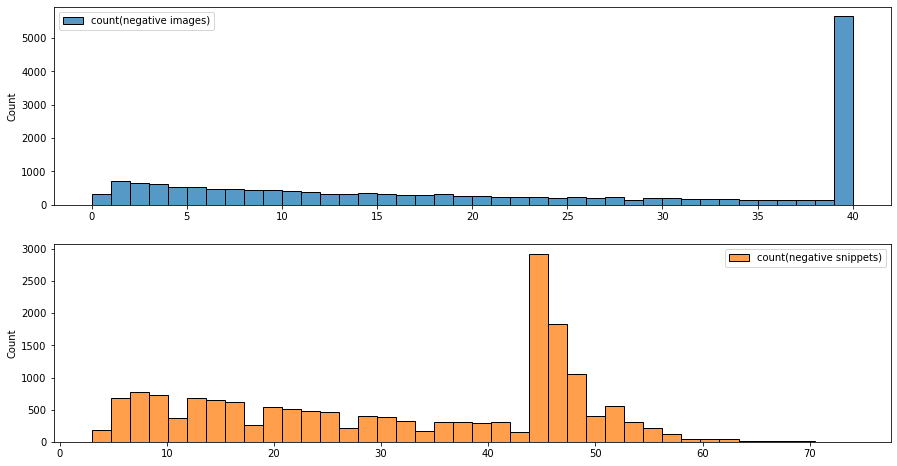

In [799]:
colors = sns.color_palette("tab10")
fig, axes = plt.subplots(2, 1, sharex=False, figsize=(15,8))
for i, k, l, color in zip(range(2), [num_negImgs, num_negSnippets], ["count(negative images)", "count(negative snippets)"], colors[:2]):
    ax = axes[i]
    #ax.set(xscale="log")
    sns.histplot(k, ax=ax, kde=False, bins=40, label=l, color=color)
    ax.legend()

In [646]:
### Create demo from json (dataset is divided into 8 chunks of size 1000 for parallel distractor mining)
path = "/home/yingshac/CYS/WebQnA/WebQnA_data_new/upd_txt_data/"

if os.path.isdir(path):
    data = {}
    files = os.listdir(path)
    print("{} files found".format(len(files)))
    for f in files:
        if not '.json' in f: continue
        data.update(json.load(open(os.path.join(path, f), "r")))
else:
    data = json.load(open(path, "r"))
print("{} samples found".format(len(data)))

html = "<html><body>"
html += "<style>th {position: sticky; top: 0;background: FloralWhite;}</style>"
html += '<table border="0" style="table-layout: fixed; width: 100%; word-break:break-word">'
html += '<tr bgcolor=gray><th width=5%>Index</th><th width=25%>Q & Pos Snippets</th><th width=40%>Neg Snippets</th><th width=30%>X_modal Facts</th></tr>'
count = 0
for k in ['3035', '7895', '5563', '4698', '2836', '7798', '4960']: #random.sample(list(data.keys()), 20): 
    word_lists = [l.split(" || ") for l in list(data[k]['word_lists'].values())]
    sen2score = {}
    for f in data[k]['new_negFacts']:
        sen2score[f['fact']] = {
            'title': f['title'],
            'scores': tuple(float(x) for x in f['scores'][1:-1].split(",")),
            'link': f['url']
        }
    cap2score = {}
    for f in data[k]['img_negFacts']:
        cap2score[f['caption']] = {
            'title': f['title'],
            'scores': tuple(float(x) for x in f['scores'][1:-1].split(",")),
            'link': f['url'],
            'img': f['imgUrl']
        }
    html += add_html_row(k, sen2score, cap2score, word_lists)
    o = open('x_distractor_for_txt_demo2.html', 'wt')

    o.write(html)
    o.close()
html += '</table></body></html>'
o = open('x_distractor_for_txt_demo2.html', 'wt')

o.write(html)
o.close()

9 files found
7921 samples found


In [388]:
### Mining + Create demo

html = "<html><body>"
html += "<style>th {position: sticky; top: 0;background: FloralWhite;}</style>"
html += '<table border="0" style="table-layout: fixed; width: 100%; word-break:break-word">'
html += '<tr bgcolor=gray><th width=5%>Index</th><th width=25%>Q & Pos Snippets</th><th width=40%>Neg Snippets</th><th width=30%>X_modal Facts</th></tr>'
count = 0
for k in [3787]: #[34, 279, 450, 474, 563, 613, 712, 842, 1311, 1793, 1936, 2340, 4266, 5279, 5620, 5800, 6845, 7018, 7529]:
    count += 1
    sen2score, cap2score, word_lists = get_sen2score_from_indx(k)
    html += add_html_row(k, sen2score, cap2score, word_lists)
    o = open('x_distractor_for_txt_demo3.html', 'wt')

    o.write(html)
    o.close()
html += '</table></body></html>'
o = open('x_distractor_for_txt_demo3.html', 'wt')

o.write(html)
o.close()

k =  3787
#pages before extension by hyperlink:  18
#pages after extension by hyperlink:  42
Q =  Which rival groups did the people who are currently the dominant ethnic group in the Xinjiang region compete with in the past?
A =  They competed with other Altaic tribes, Indo-European empires from the south and west and Sino-Tibetan empires to the east.
keywords =  {'dominant', 'ethnic', 'rival', 'Region', 'region', 'xinjiang', 'Past', 'Rival', 'Xinjiang', 'groups', 'group', 'Group', 'People', 'people', 'Dominant', 'Groups', 'Ethnic', 'past'}
titlewords =  {'History', 'Xinjiang', 'Christianity', 'people', 'Uyghur'}
answerwords =  {'tribes', 'indo', 'south', 'West', 'Sino', 'Tibetan', 'european', 'Other', 'Empires', 'Altaic', 'other', 'Indo', 'South', 'tibetan', 'east', 'European', 'East', 'empires', 'sino', 'Tribes', 'west', 'altaic'}
goldfactwords =  {'Brief', 'Republic', 'powers', 'story', 'Christianity', 'muslim', 'Tribe', 'few', 'Mountains', 'Nomadic', 'nomadic', 'small', 'Story', 'r

In [373]:
### Post-editing compensation for no 'https:' before '//upload' in demo
with open('0719demo.html','r') as f:
    file = f.read()
f.close()
print(type(file))
print(len(file))
indices = [i for i in range(len(file)) if file.startswith('//upload.wikimedia.org/wikipedia/commons/', i)]
count = 0
for i in indices:
    file = file[:i+6*count] + 'https:' + file[6*count+i:]
    count += 1
print(len(file))
o = open('0719_demo.html', 'wt')

o.write(file)
o.close()

<class 'str'>


In [514]:
no_word_list_k = []
for k in data:
    if not 'word_lists' in data[k]:
        no_word_list_k.append(k)
print(len(no_word_list_k))

112


In [515]:
### At least this many samples will not get new_negFacts from my alg
no_wiki_k = []
for k in new_txt_data:
    if k in no_word_list_k: continue
    if all(['wikipedia.org/' not in f['url'] for f in new_txt_data[k]['SupportingFacts']]):
        no_wiki_k.append(k)
        print([f['url'] for f in new_txt_data[k]['DistractorFacts']])
        print(data[k]['word_lists']['keywords'])
print(len(no_wiki_k))

['https://en.wikipedia.org/wiki/Patrick_Dunne_(priest)', 'https://en.wikipedia.org/wiki/Patrick_Dunne_(priest)', 'https://en.wikipedia.org/wiki/Patrick_Dunne_(priest)', 'https://en.wikipedia.org/wiki/Patrick_Dunne_(priest)', 'https://en.wikipedia.org/wiki/Patrick_Dunne_(priest)', 'https://sbcl.wa.edu.au/about/history/', 'https://www.broadwayworld.com/people/Patrick-Dunn/', 'https://stbrigidsms.wa.edu.au/our-school/history-of-our-school']
Principals || More || scoil || Many || bhride || principals || 1960s || more || many || Scoil || Bhride || 1970s
['https://en.wikipedia.org/wiki/Social_media_use_in_politics', 'https://en.wikipedia.org/wiki/List_of_social_networking_websites', 'https://en.wikipedia.org/wiki/Social_media_use_in_politics', 'https://en.wikipedia.org/wiki/Social_media_marketing', 'https://en.wikipedia.org/wiki/Social_media_use_in_politics']
politicians || Social || younger || social || media || Platforms || Younger || Politicians || Voters || Media || voters || platforms |